Si Only: Comparison: Year 2016, Old: 201905ReRun (except some months)  New:202007A

In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
tmask = mesh['tmask']
deptht = mesh['gdept_1d'][0]

In [3]:
year = '2016'
olddir = 'new201905/'
newdir = '202007/202007A/'

In [4]:
def surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, twoD=False, year=year, olddir=olddir):
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')

    if twoD:
        mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0, 0])
    else:
        mean_field = np.ma.array(dm[tracer][0, 0], mask=1-tmask[0, 0])
    colours = axs[0].pcolormesh(mean_field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(olddir)
    fig.colorbar(colours, ax=axs[0])
    
    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    
    if twoD:
        field = np.ma.array(ds[tracer][0], mask=1-tmask[0,0])
    else:
        field = np.ma.array(ds[tracer][0, 0], mask=1-tmask[0,0])
    colours = axs[1].pcolormesh(field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(newdir)
    fig.colorbar(colours, ax=axs[1])
    
    colours = axs[2].pcolormesh(field-mean_field, cmap=cdiff, vmax=dvmax, vmin=-dvmax)
    axs[2].set_title("New - Old")
    fig.colorbar(colours, ax=axs[2])
    ds.close()
    dm.close()


    for ax in axs:
        viz_tools.set_aspect(ax)

    return fig

In [5]:
def profiles(tracer, file, year=year, olddir=olddir):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0])
    axs[0].plot(mean_field.mean(axis=1).mean(axis=1), deptht, linewidth=2, label='Old')
    axs[1].plot(np.zeros_like(deptht), deptht, linewidth=2, label='Old')
    
    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')

    field = np.ma.array(ds[tracer][0], mask=1-tmask[0])
    axs[0].plot(field.mean(axis=1).mean(axis=1), deptht, label='New')
    
    axs[1].plot((field-mean_field).mean(axis=1).mean(axis=1), deptht, label='New')
    print (mean_field.mean(axis=1).mean(axis=1).max(), field.mean(axis=1).mean(axis=1).max())
    ds.close()
    dm.close()

    
    axs[0].invert_yaxis()
    axs[0].legend(loc='best')
    
    axs[1].invert_yaxis()
    axs[1].legend(loc='best')
    
    return fig

In [6]:
def thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, year=year, olddir=olddir):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    mean_field = np.array(dm[tracer][0])
    colours = vis.contour_thalweg(axs[0], mean_field, bathy, mesh,np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap=cmap)
    axs[0].set_title(olddir)

    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    field = np.array(ds[tracer][0])
    colours = vis.contour_thalweg(axs[1], field, bathy, mesh,np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap=cmap)

    axs[1].set_title(newdir)
    colours = vis.contour_thalweg(axs[2], field-mean_field, bathy, mesh, np.arange(-dvmax, 1.2*dvmax, dvmax/5), 
                                      cmap=cdiff)
 
    axs[2].set_title('New - Old')
    ds.close()
    dm.close()

    fig.tight_layout()
    return fig

## January

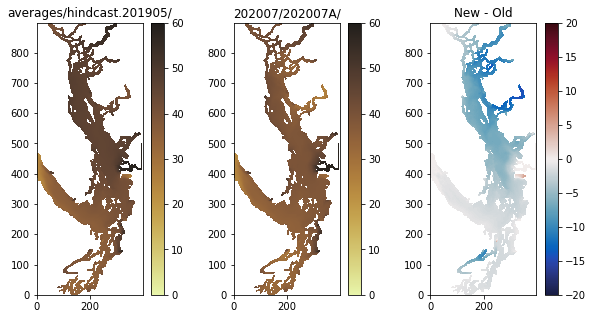

In [7]:
tracer = 'silicon'
file = 'ptrc'
month = '01'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 0
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

68.07016512280015 63.76390906626673


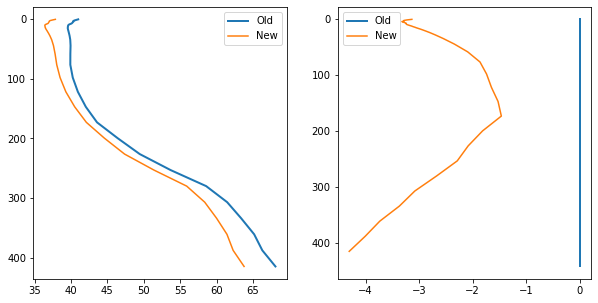

In [8]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

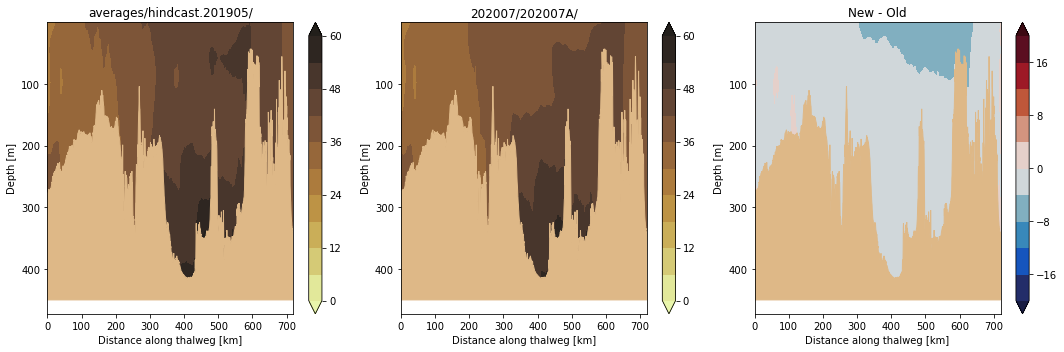

In [9]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

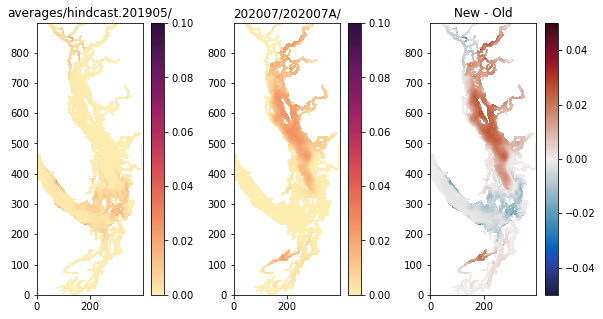

In [10]:
tracer = 'biogenic_silicon'
file = 'ptrc'
month = '01'
cmap = cm.matter
cdiff = cm.balance
vmax = 0.1
vmin = 0
dvmax = 0.05
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

0.04210438563129771 0.19027534915097516


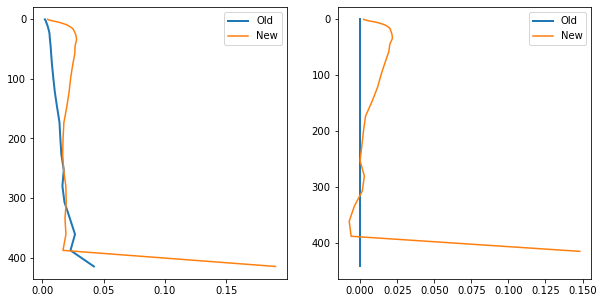

In [11]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

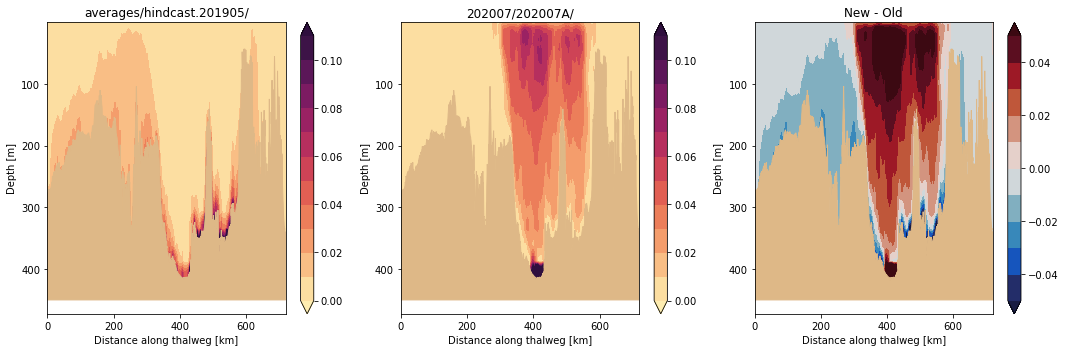

In [12]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

## February

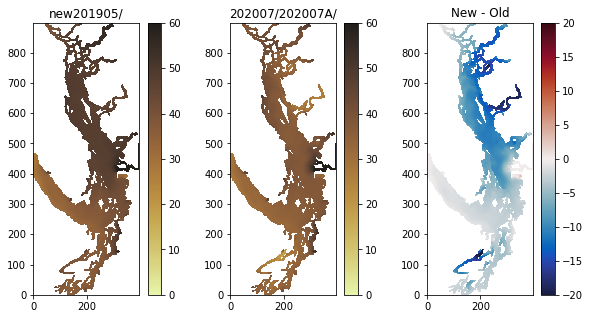

In [16]:
tracer = 'silicon'
file = 'ptrc'
month = '02'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 0
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

71.93146034947426 66.45142988338444


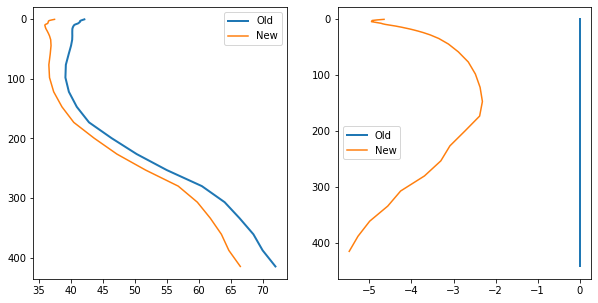

In [17]:
fig = profiles(tracer, file)

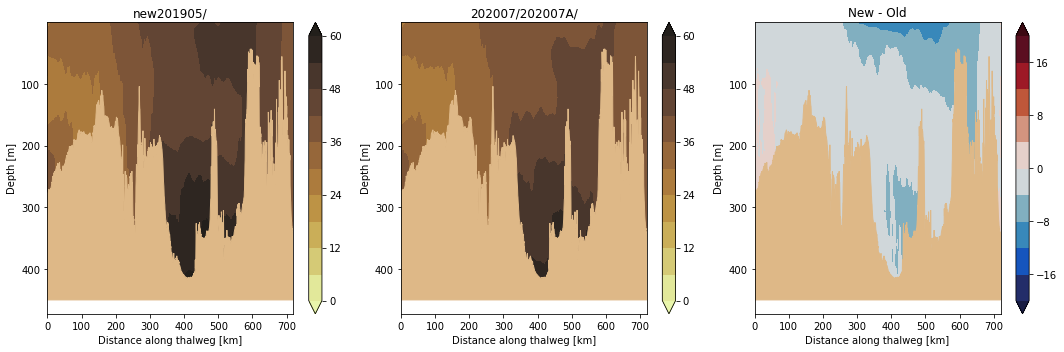

In [18]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

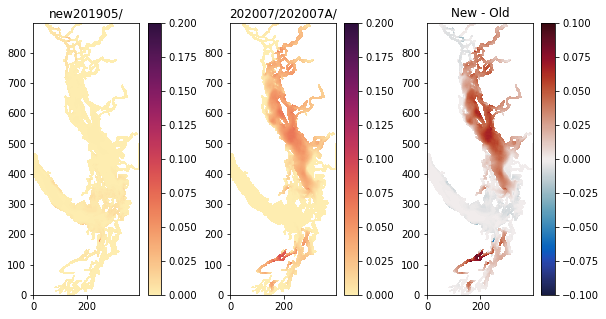

In [19]:
tracer = 'biogenic_silicon'
file = 'ptrc'
month = '02'
cmap = cm.matter
cdiff = cm.balance
vmax = 0.2
vmin = 0
dvmax = 0.1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.027714066449396505 0.3119302358761573


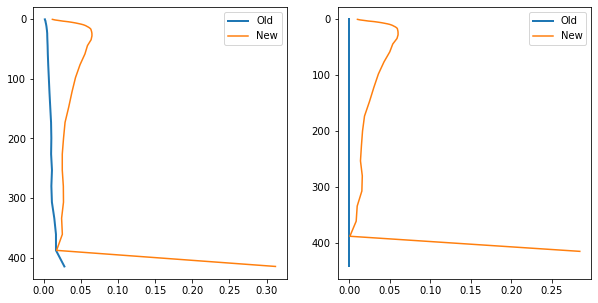

In [20]:
fig = profiles(tracer, file)

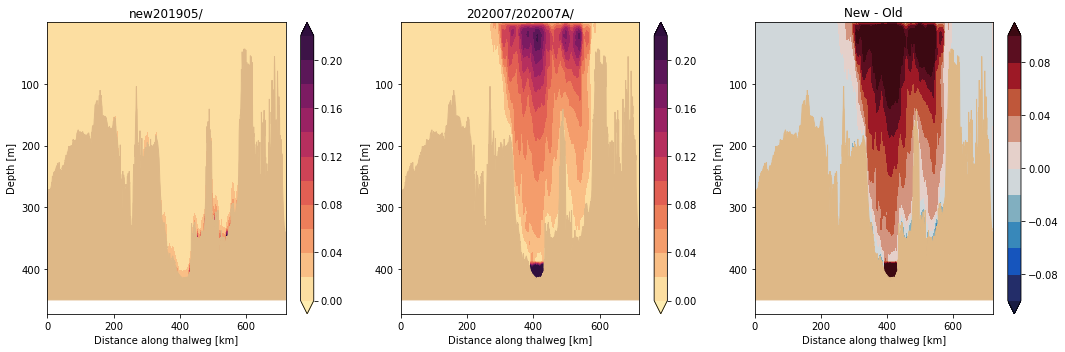

In [21]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## March:

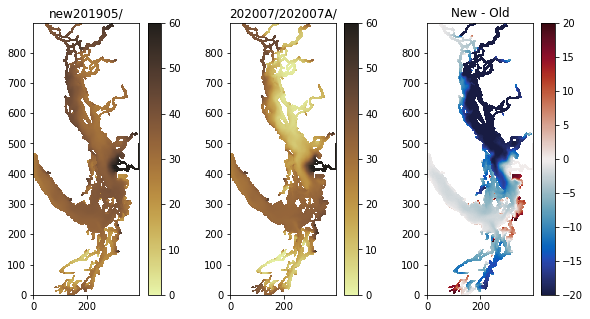

In [19]:
tracer = 'silicon'
file = 'ptrc'
month = '03'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 0
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

72.58104801545149 73.24848286822551


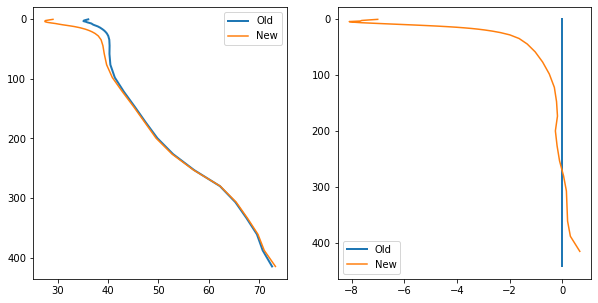

In [20]:
fig = profiles(tracer, file)

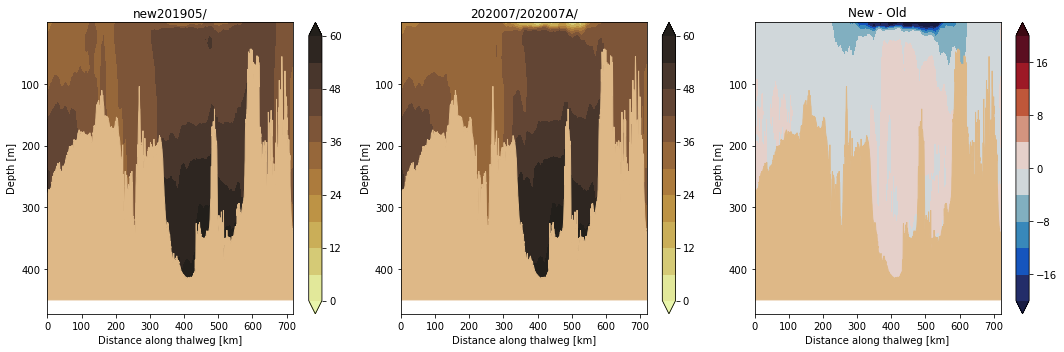

In [21]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

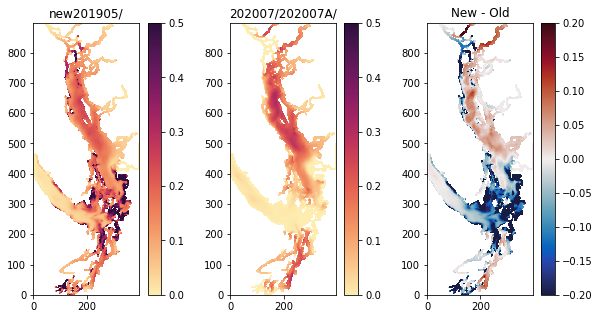

In [22]:
tracer = 'biogenic_silicon'
file = 'ptrc'
month = '03'
cmap = cm.matter
cdiff = cm.balance
vmax = 0.5
vmin = 0
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.7639868583763062 1.7928615377888948


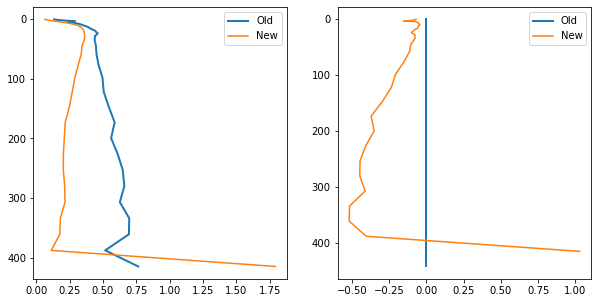

In [23]:
fig = profiles(tracer, file)

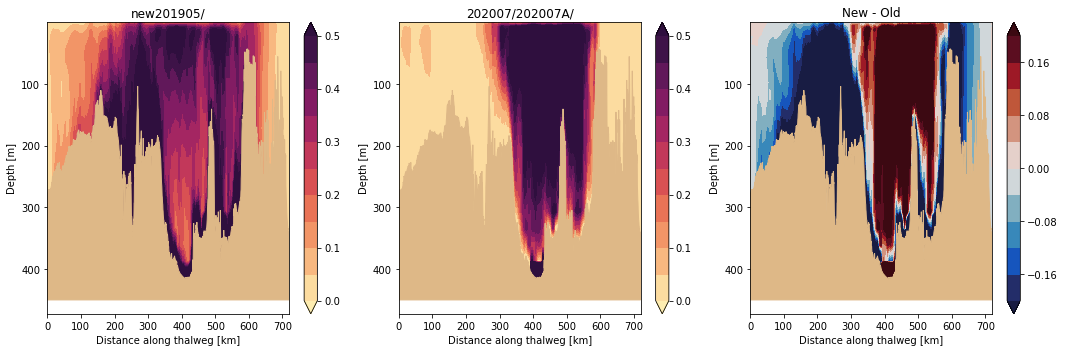

In [24]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## April:

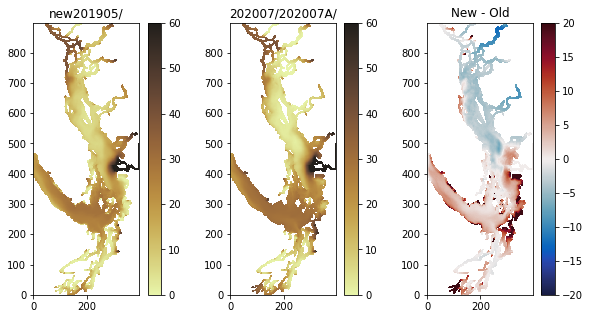

In [25]:
tracer = 'silicon'
file = 'ptrc'
month = '04'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 0
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

76.31536035685829 76.18192159624819


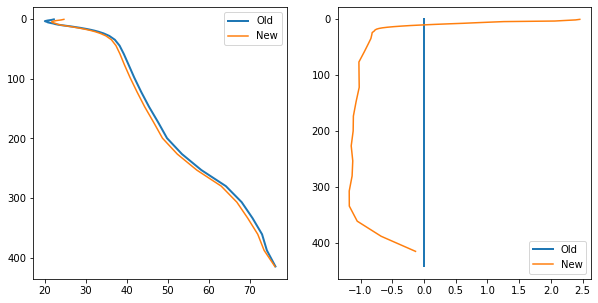

In [26]:
fig = profiles(tracer, file)

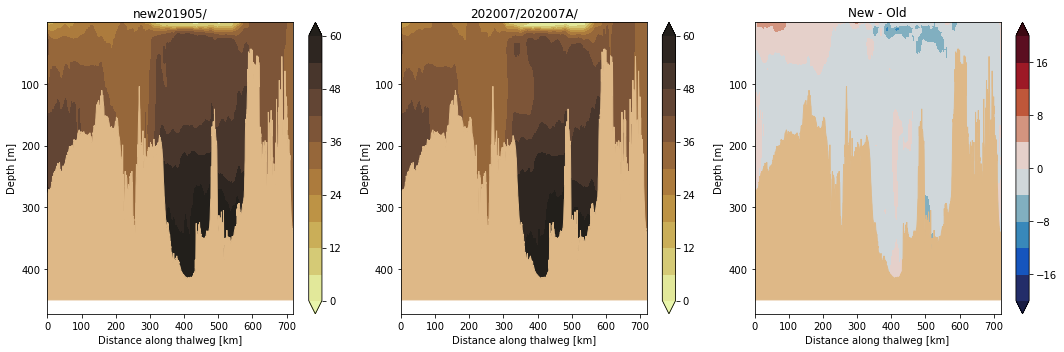

In [27]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

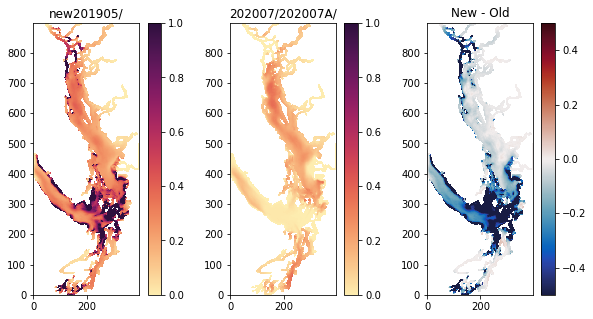

In [28]:
tracer = 'biogenic_silicon'
file = 'ptrc'
month = '04'
cmap = cm.matter
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

4.133146620293015 2.289711947476776


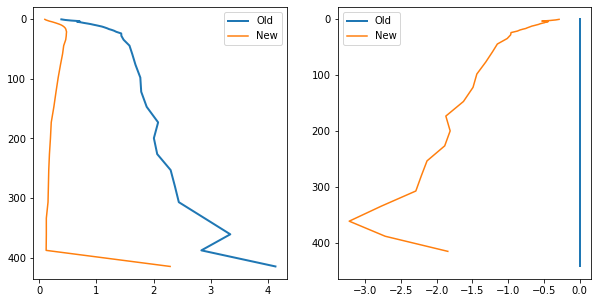

In [29]:
fig = profiles(tracer, file)

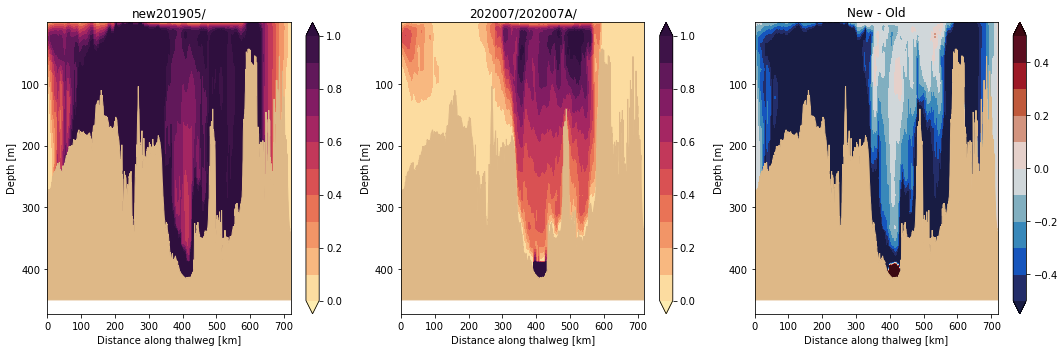

In [30]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## May:

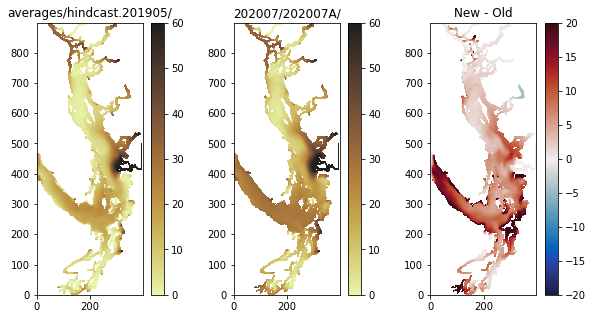

In [31]:
tracer = 'silicon'
file = 'ptrc'
month = '05'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 0
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

79.71460328725935 78.09608725362185


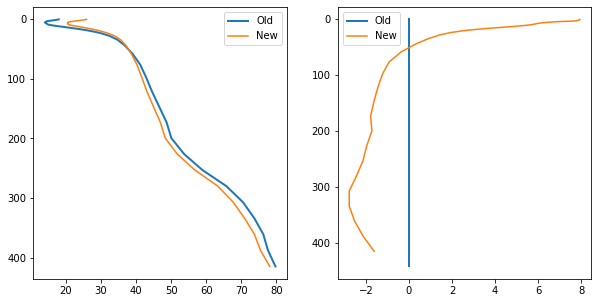

In [32]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

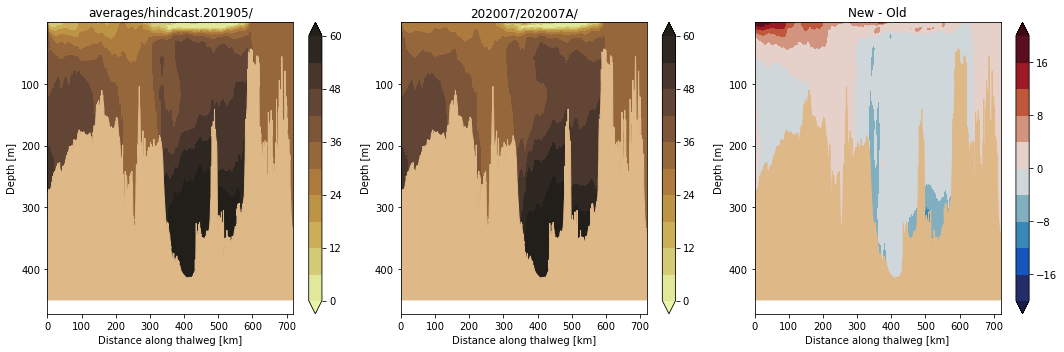

In [33]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

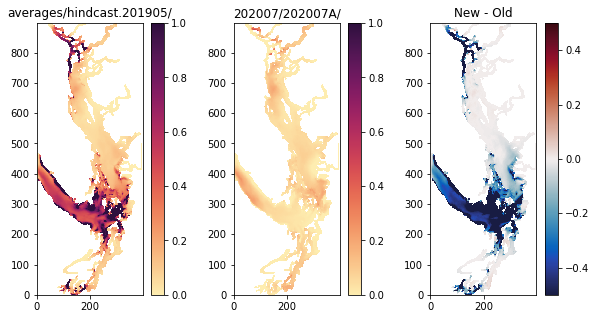

In [34]:
tracer = 'biogenic_silicon'
file = 'ptrc'
month = '05'
cmap = cm.matter
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

4.309575675861895 1.9960422947534042


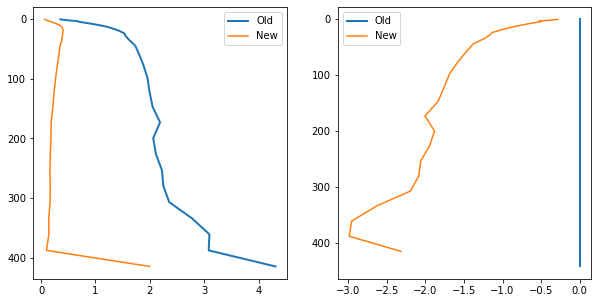

In [35]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

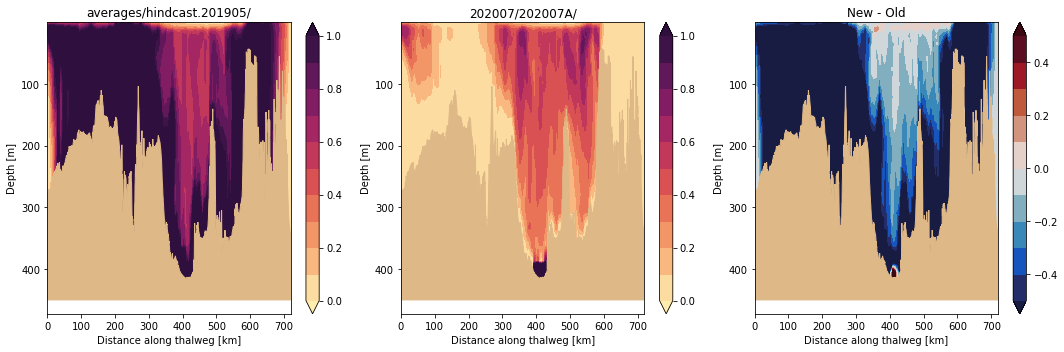

In [36]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

## June

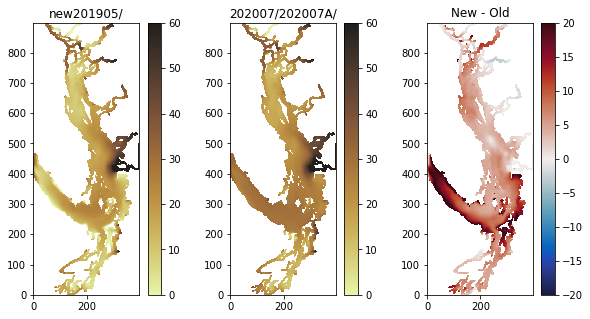

In [37]:
tracer = 'silicon'
file = 'ptrc'
month = '06'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 0
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

84.2708397034696 79.77846200042943


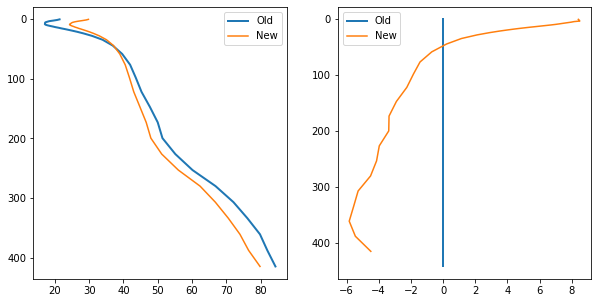

In [38]:
fig = profiles(tracer, file)

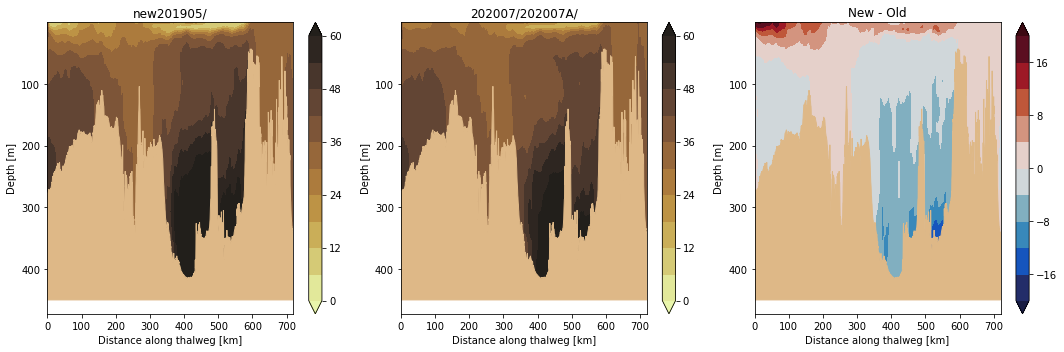

In [39]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

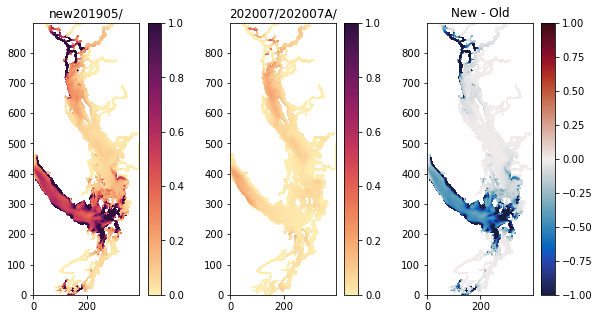

In [40]:
tracer = 'biogenic_silicon'
file = 'ptrc'
month = '06'
cmap = cm.matter
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

5.130803720377279 1.7295028760799958


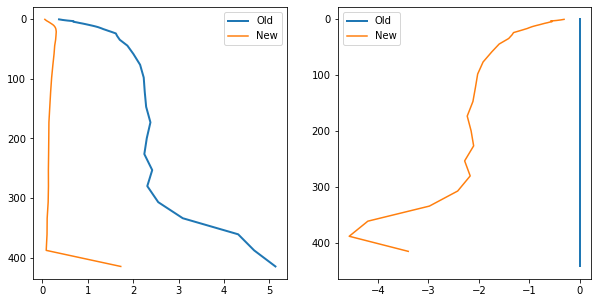

In [41]:
fig = profiles(tracer, file)

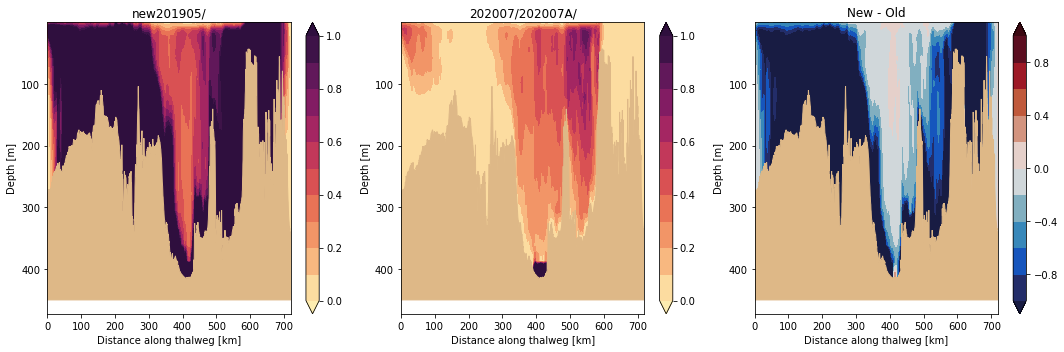

In [42]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## July

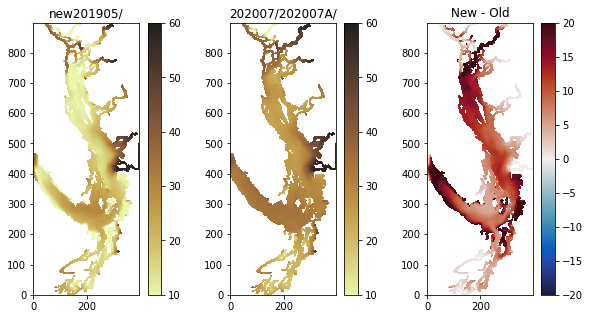

In [43]:
tracer = 'silicon'
file = 'ptrc'
month = '07'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 10
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

84.04779001644567 78.20842349768314


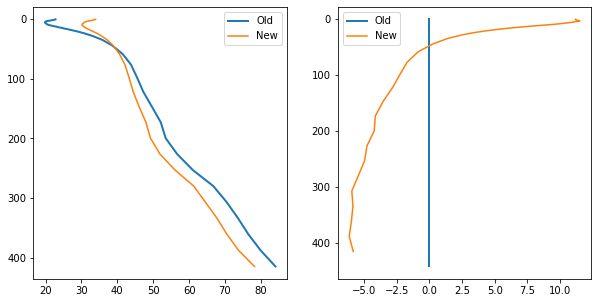

In [44]:
fig = profiles(tracer, file)

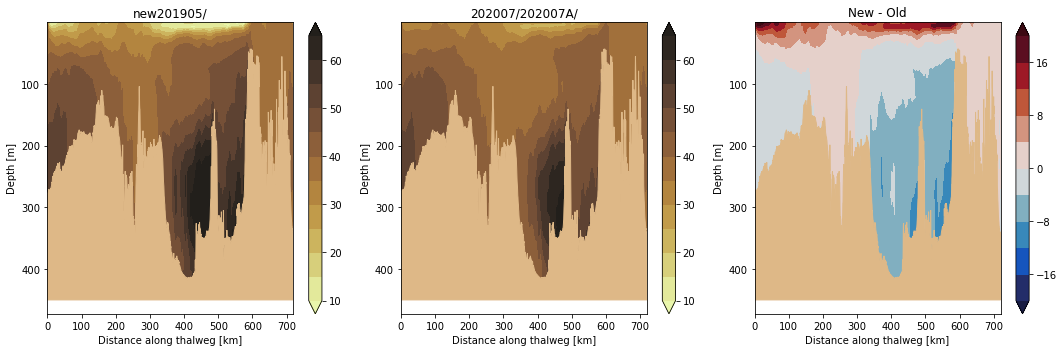

In [45]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

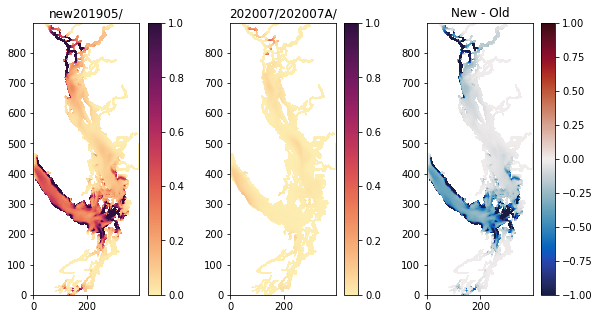

In [46]:
tracer = 'biogenic_silicon'
file = 'ptrc'
month = '07'
cmap = cm.matter
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

6.706385724833326 1.5351798543166744


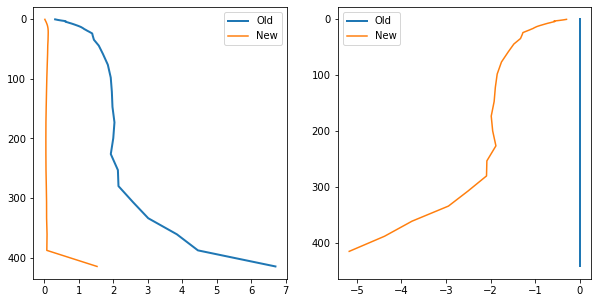

In [47]:
fig = profiles(tracer, file)

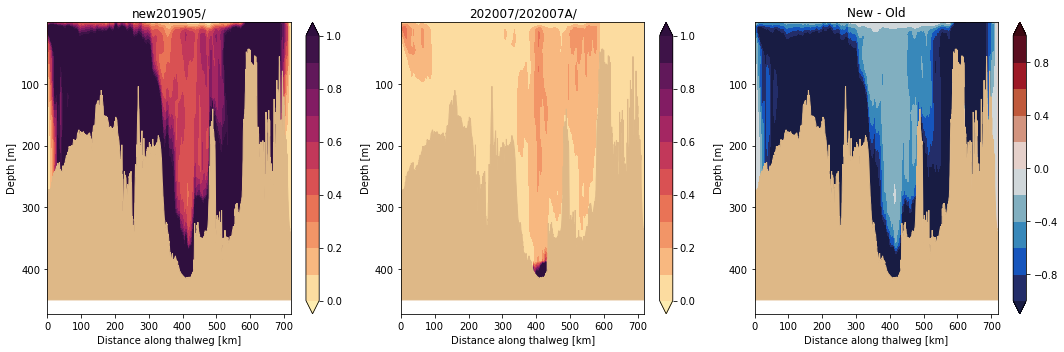

In [48]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## August

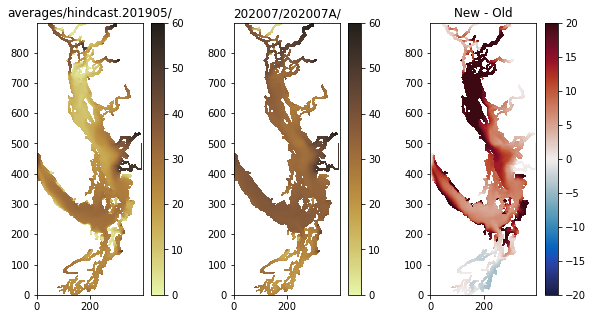

In [49]:
tracer = 'silicon'
file = 'ptrc'
month = '08'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 0
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

80.94332956841322 76.30083015063032


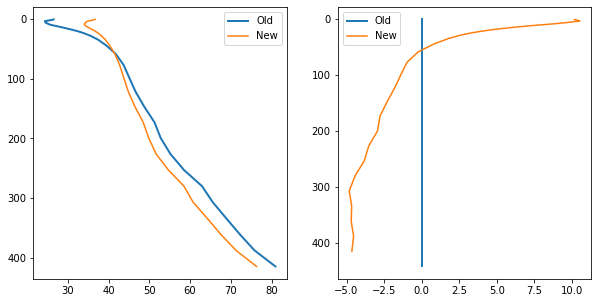

In [50]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

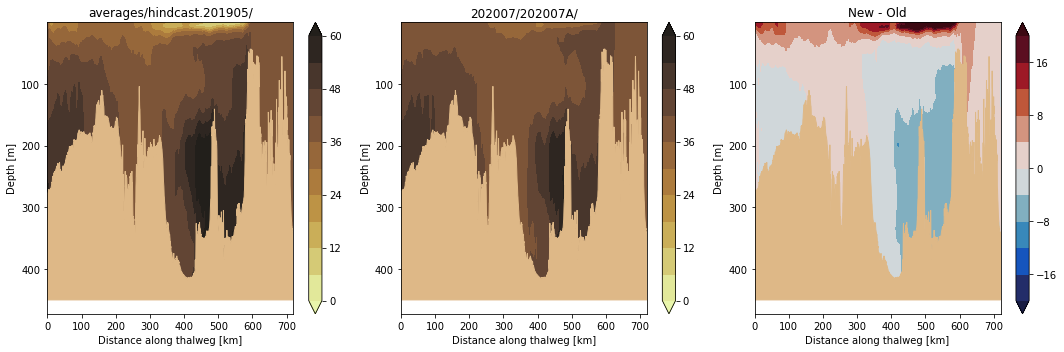

In [51]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

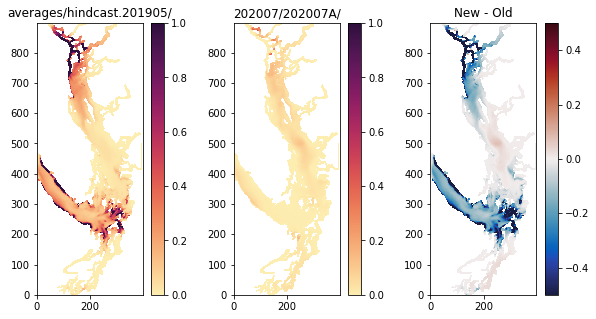

In [52]:
tracer = 'biogenic_silicon'
file = 'ptrc'
month = '08'
cmap = cm.matter
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

3.5167998602985797 0.6857275716238652


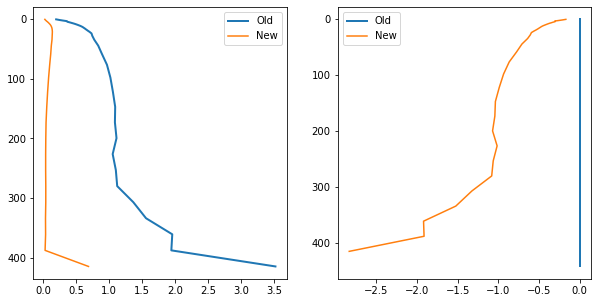

In [53]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

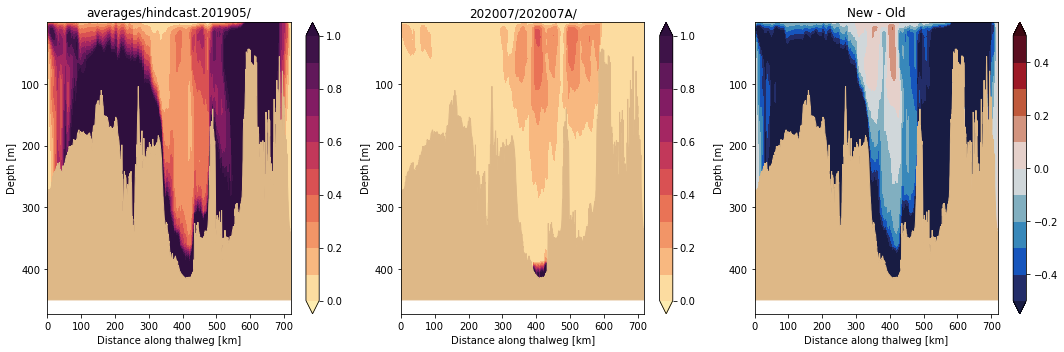

In [54]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

## September

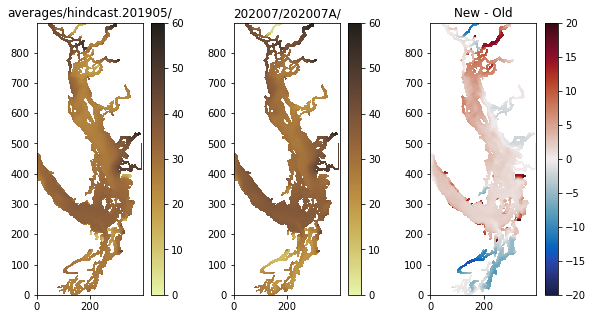

In [55]:
tracer = 'silicon'
file = 'ptrc'
month = '09'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 0
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

73.30363448469329 67.8428859497846


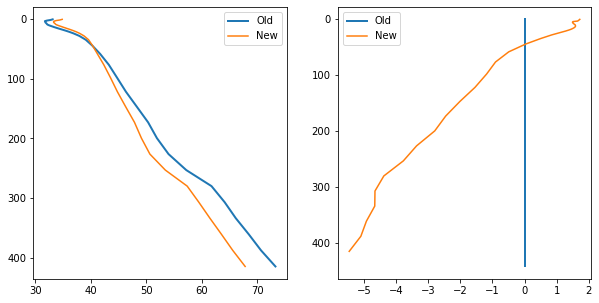

In [56]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

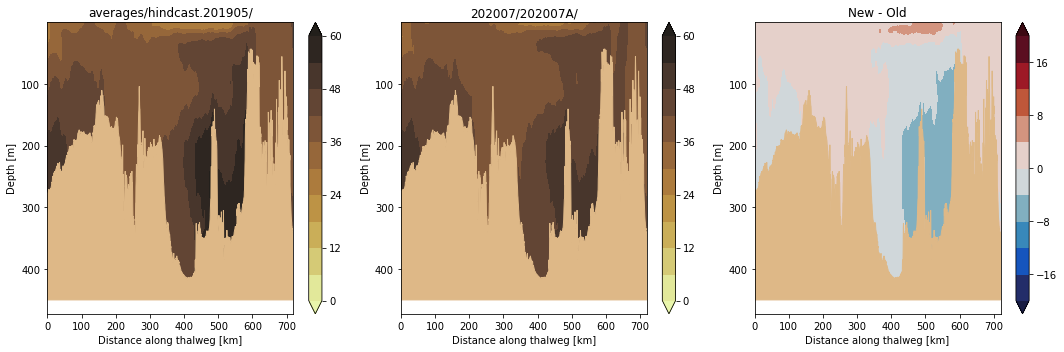

In [57]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

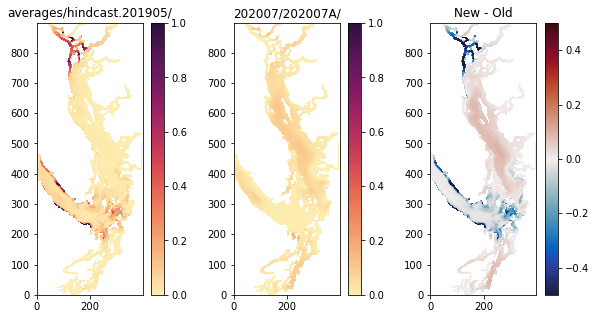

In [58]:
tracer = 'biogenic_silicon'
file = 'ptrc'
month = '09'
cmap = cm.matter
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

2.320696852624789 0.8464317399935782


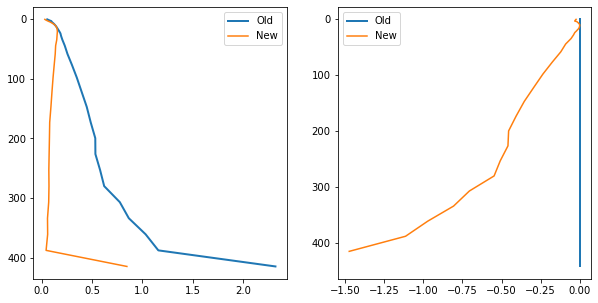

In [59]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

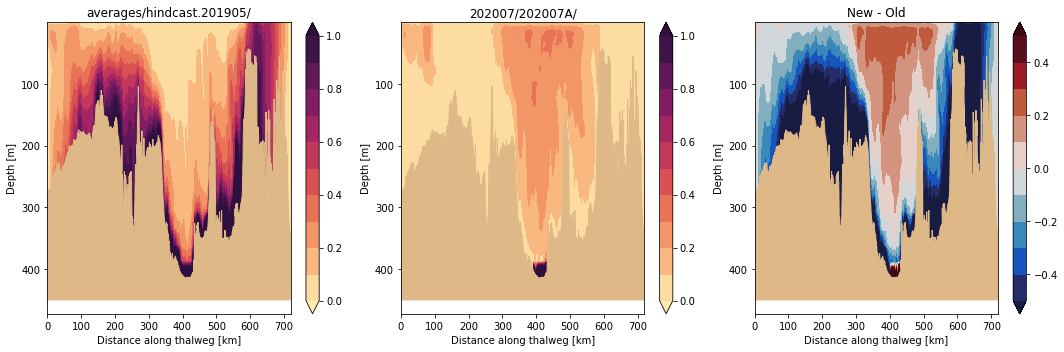

In [60]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

## October

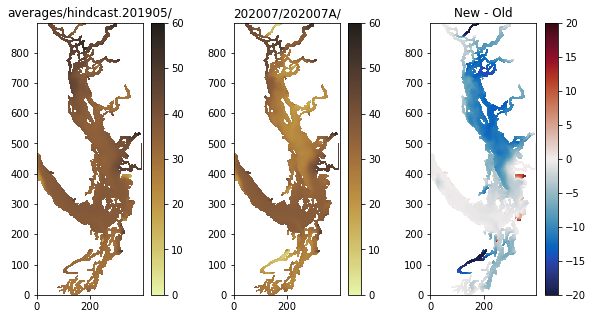

In [61]:
tracer = 'silicon'
file = 'ptrc'
month = '10'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 0
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

66.09624630774097 60.70260078156733


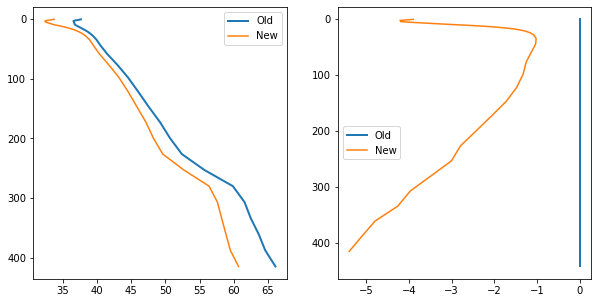

In [62]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

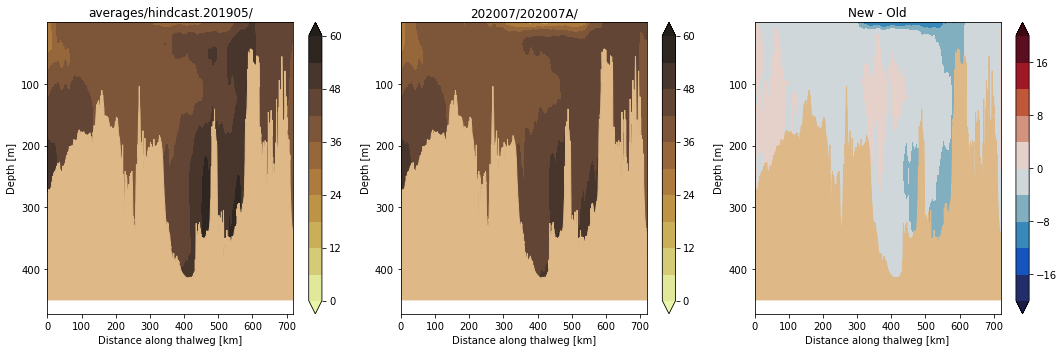

In [63]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

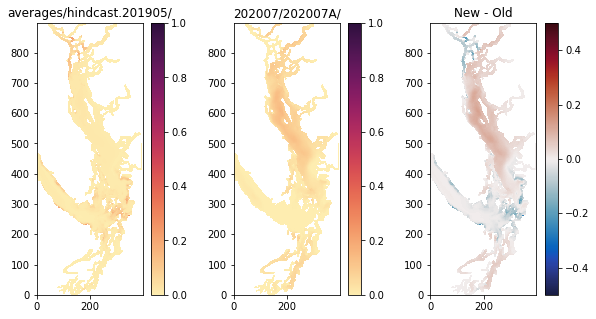

In [64]:
tracer = 'biogenic_silicon'
file = 'ptrc'
month = '10'
cmap = cm.matter
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

0.5205011062409255 0.8696358200174549


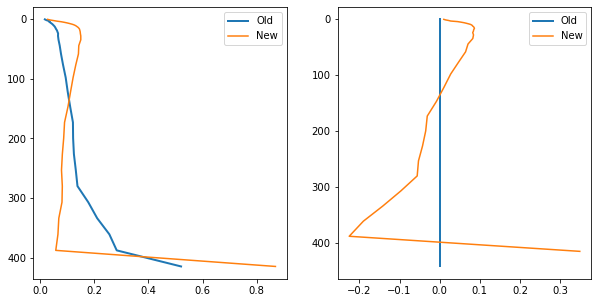

In [65]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

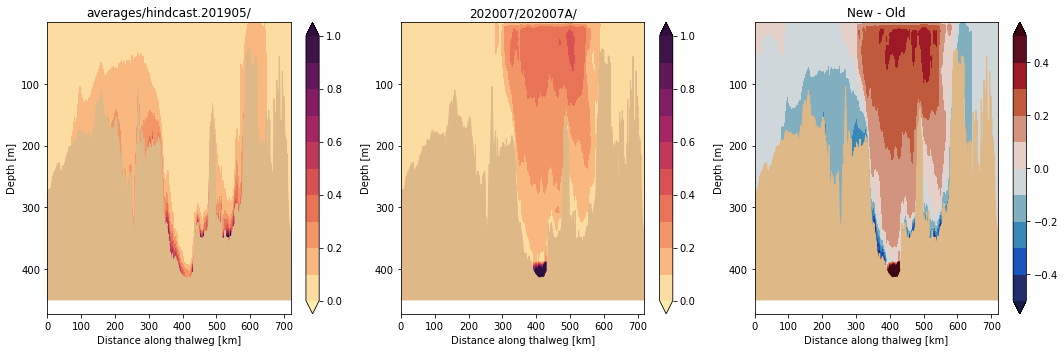

In [66]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

## November

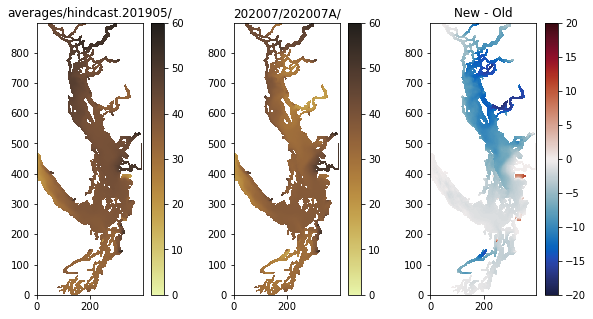

In [67]:
tracer = 'silicon'
file = 'ptrc'
month = '11'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 0
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

62.156093750187765 57.61937524173939


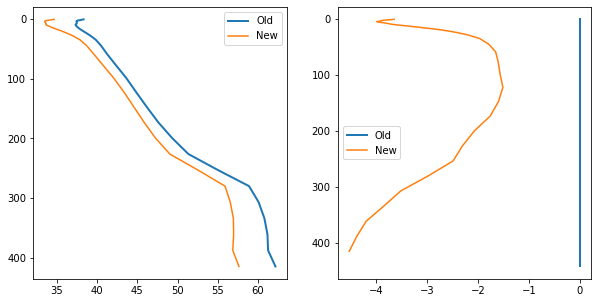

In [68]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

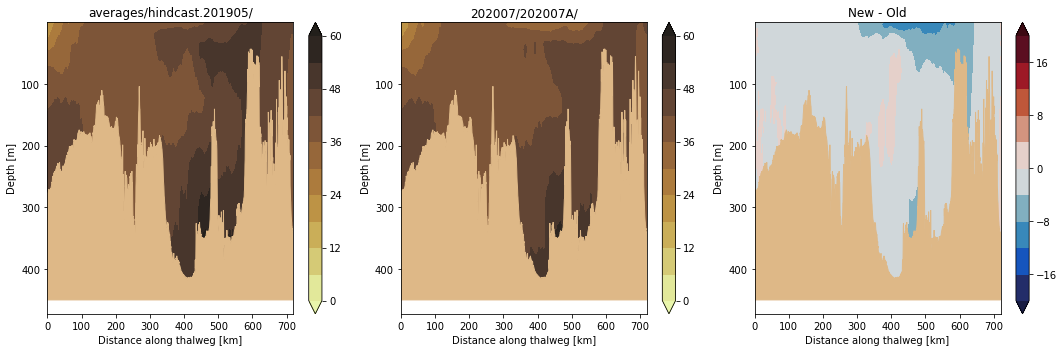

In [69]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

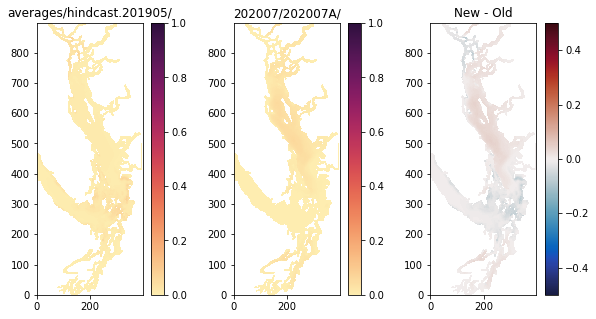

In [70]:
tracer = 'biogenic_silicon'
file = 'ptrc'
month = '11'
cmap = cm.matter
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

0.22188453502745403 0.7646057108527533


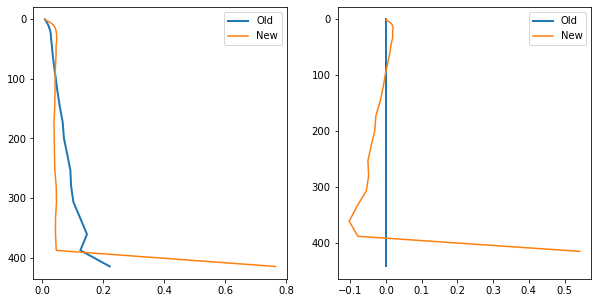

In [71]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

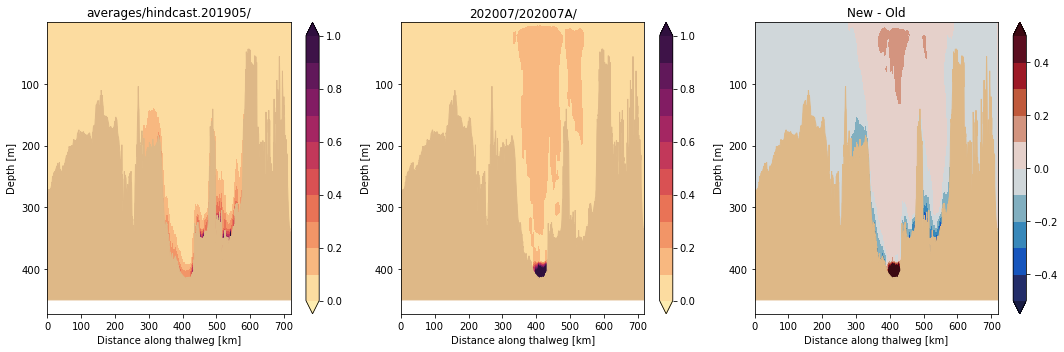

In [72]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

## December

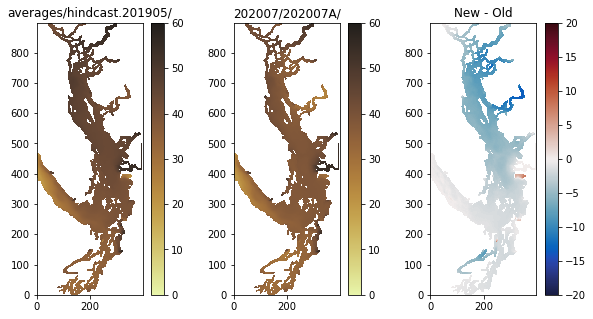

In [73]:
tracer = 'silicon'
file = 'ptrc'
month = '12'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 0
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

64.87644821611136 60.622686498469214


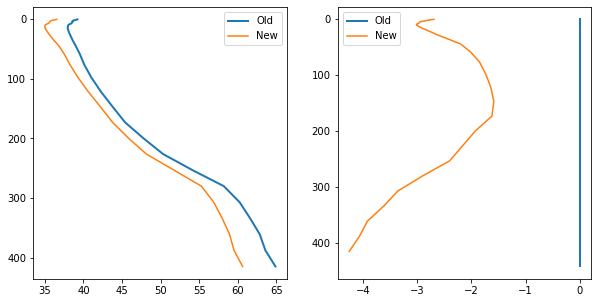

In [74]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

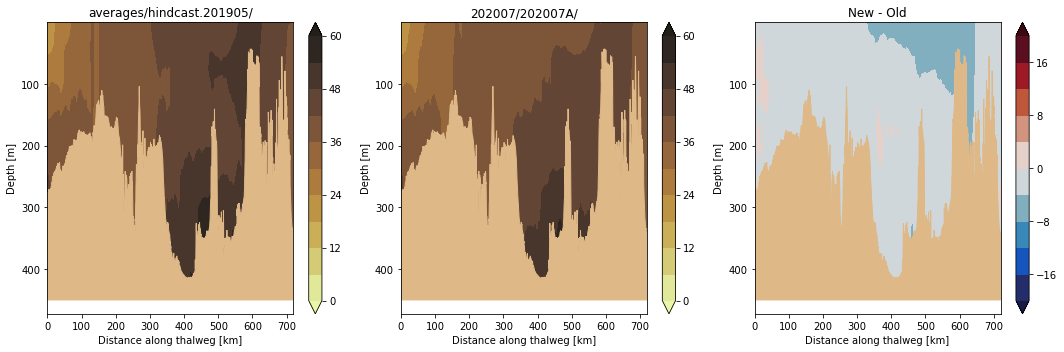

In [75]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

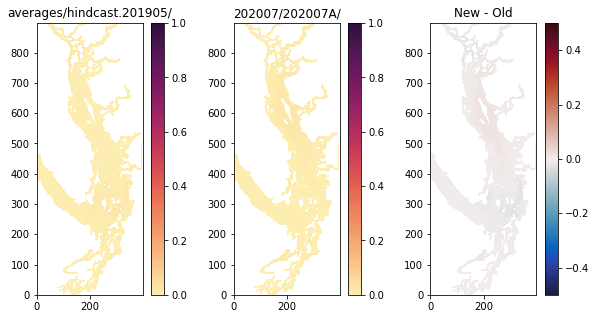

In [77]:
tracer = 'biogenic_silicon'
file = 'ptrc'
month = '12'
cmap = cm.matter
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

0.09974715708334608 0.31819127037181133


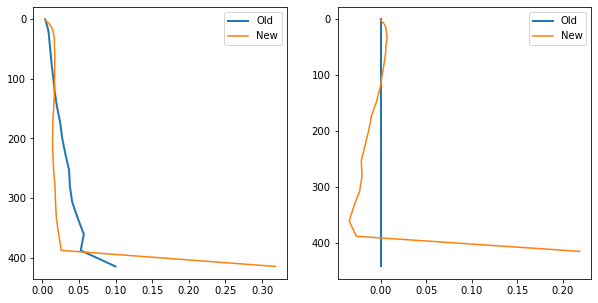

In [78]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

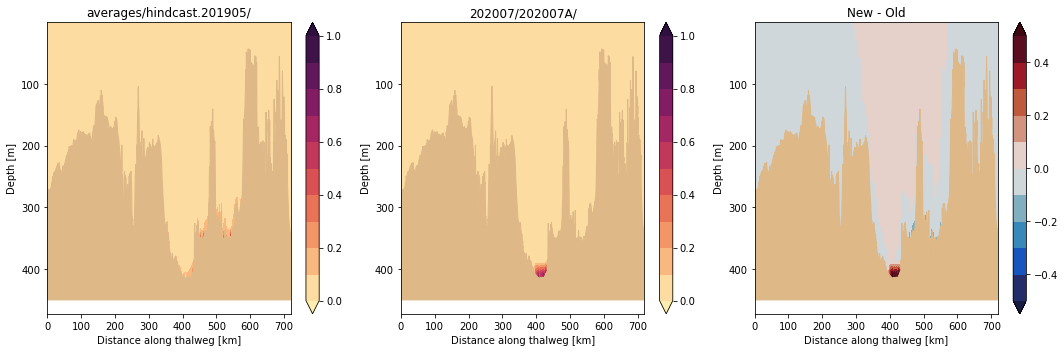

In [79]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')